<a href="https://colab.research.google.com/github/jorgepereira96/SAD_JorgePereira/blob/master/trabalho_Sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

In [0]:
uploaded = files.upload()

In [0]:
uploaded = files.upload()

In [119]:
df_movies = pd.read_csv('movies_metadata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_ratings = pd.read_csv('ratings_small.csv')

In [0]:
#Mudar nome de coluna, para se fazer a junção
df_ratings.rename(columns ={'movieId':'id'}, inplace= True)
df_ratings.columns
df_ratings

In [0]:
frames = [df_movies, df_ratings]
result = pd.concat(frames)

In [123]:
#Seleção das colunas que intereçam para o nosso estudo

df_final=result[['id','original_title','budget','genres','original_language',
                 'rating','popularity','production_companies',
                 'production_countries','runtime','revenue']]

new_bud=pd.to_numeric(df_final.budget, errors='coerce')
df_final['Budget']=new_bud

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [124]:
#Lucro dos filmes
df_final['lucro']=df_final['revenue']-df_final['Budget']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
df=df_final.drop(columns=['budget'])
df.dtypes

id                       object
original_title           object
genres                   object
original_language        object
rating                  float64
popularity               object
production_companies     object
production_countries     object
runtime                 float64
revenue                 float64
Budget                  float64
lucro                   float64
dtype: object

In [126]:
df.head(10)

,id,original_title,genres,original_language,rating,popularity,production_companies,production_countries,runtime,revenue,Budget,lucro
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,NaN,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,373554033.0,30000000.0,343554033.0
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,NaN,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,262797249.0,65000000.0,197797249.0
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,NaN,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",101.0,0.0,0.0,0.0
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,NaN,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,81452156.0,16000000.0,65452156.0
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",en,NaN,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",106.0,76578911.0,0.0,76578911.0
5,949,Heat,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,NaN,17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",170.0,187436818.0,60000000.0,127436818.0
6,11860,Sabrina,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,NaN,6.67728,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",127.0,0.0,58000000.0,-58000000.0
7,45325,Tom and Huck,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,NaN,2.56116,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",97.0,0.0,0.0,0.0
8,9091,Sudden Death,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,NaN,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",106.0,64350171.0,35000000.0,29350171.0
9,710,GoldenEye,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,NaN,14.686,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",130.0,352194034.0,58000000.0,294194034.0


## Catalogação do dataset

### Tamanho


In [127]:
#Tamanho
print('Tamnho Dataset: ')
df.shape

Tamnho Dataset: 


(145470, 12)

### Resolução


*   id: unique/int
*   original_title: Título original do filme
*   budget: (float)Custo da produção do filme
*   genres: Genero que do filme
*   original_language: Lingualgem
*   rating:(float) Notas de 0 a 10 para a classificação
*   popularity: Popularidade do filme
*   production_companies: Equipa de produção do filme
*   production_countries: Origem da equipa de produção do filme
*   runtime: (float) Tempo de duração do filme 
*   revenue:(float) Ganhos de impresa com o filme, exemplo *merchandise* e serviços ao cliente





### Dimensionalidade/Esparcidade


In [110]:
#Dimensionalidade
print('Dimensionalidade do dataset: ' + str(len(df.columns)) + ' colunas\n')

#Esparsidade
print('Esparsidade de cada coluna do dataset:')
ts = pd.Series(np.random.randn(10))
ts[2:-2] = np.nan
sts = ts.to_sparse()
print(sts)
print('\n')

Dimensionalidade do dataset: 12 colunas

Esparsidade de cada coluna do dataset:
0    0.819728
1   -0.814887
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8   -0.340321
9    2.015078
dtype: float64
BlockIndex
Block locations: array([0, 8], dtype=int32)
Block lengths: array([2, 2], dtype=int32)




### Valores Médios


In [111]:
#Estatisticas da label/target
display(df.describe())
print('\nRatings')
df['rating'].agg(['min','max','mean'])



,rating,runtime,revenue,Budget,lucro
count,100004.000000,45203.000000,4.546000e+04,4.546300e+04,4.546000e+04
mean,3.543608,94.128199,1.120935e+07,4.224579e+06,6.984491e+06
std,1.058064,38.407810,6.433225e+07,1.742413e+07,5.214125e+07
min,0.500000,0.000000,0.000000e+00,0.000000e+00,-1.657101e+08
25%,3.000000,85.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000,95.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.000000,107.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,5.000000,1256.000000,2.787965e+09,3.800000e+08,2.550965e+09



Ratings


min     0.500000
max     5.000000
mean    3.543608
Name: rating, dtype: float64

### Termos estatísticos Label/Target 

Sendo o nosso Target o rating dos filmes, podemos observar e concluir que em média os filmes tem uma classificação de 3.543608 de 0 a 5. A classificação mais alta dada a um filme foi de 5, e a menor classificação é de 0.500000.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)



Este gráfico representa a contagem de classificação dos filmes 



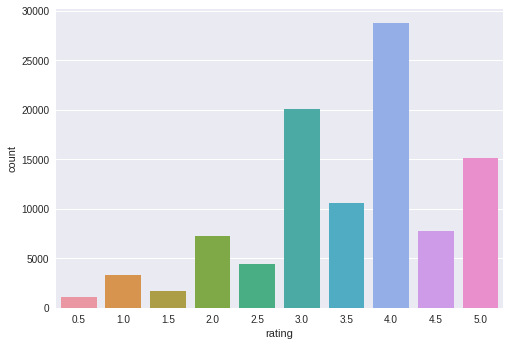

In [112]:
sns.countplot(df['rating'])

print('\nEste gráfico representa a contagem de classificação dos filmes \n')

### Tipos das features

* id: Discreto 
* original_title: Qualitativo
* budget: Continuo
* genres: Qualitativo
* original_language: Qualitativo
* rating: Continuo
* popularity: Continuo
* production_companies: Qualitativo
* production_countries: Qualitativo
* runtime: Continuo

### Análise NaN's


In [128]:
#Verificar se há colunas a NULL
df.isna().any()

id                      False
original_title           True
genres                   True
original_language        True
rating                   True
popularity               True
production_companies     True
production_countries     True
runtime                  True
revenue                  True
Budget                   True
lucro                    True
dtype: bool

In [0]:
#Alteração de Null para zero em 'rating','runtime','revenue'.
df.fillna(value=0,inplace=True)

df["rating"] = df["rating"].astype(int)
df["runtime"] = df["runtime"].astype(int)
df["revenue"] = df["revenue"].astype(int)

### Quais as features em termos do problema que não fazem sentido

Depois de uma análise a todas as features chegámos á concordância de que algumas teriam de ser rejeitadas com o fim de facilitar o nosso modelo e torná-lo mais prático.
Segue a listagem das features rejeitadas:

* *imdbId* -Id do imdb do filme;
* *tmdbId* - Id de tmdb do filme; 
* *aduld*- feature binário do filme ser para maiores de 18, ou não;
* *belongs_to_collection* - nome da coleção do filme, se este fizer parte de uma coleção;
* *homepage* - url do site do filme;
* *imdb_Id* - Id do imdb do filme;
* *overview* - Pequeno resumo do plot do filme;
* *poster_path* - Imagem do poster do filme;
* *release*-date - Data de lançamento do filme;
* *spoken_languages* - Todas as línguas faladas no filme;
* *status* - Estado do filme, se já foi lançado ou não;
* *tagline* - O filme em poucas palavras;
* *video *- boolean;
* *vote_average* - Média da classificação de votos;
* *vote_count* - Quantidade de votos;
* *timestamp* - data de lançamento;

### Features que poderia utilizar para enriquecer a informação do problema

Outros features que pensamos que nos podiam ajudar no modelo seriam:

* Atores principais e atores secundários - Uma listagem dos atores principais e secundários juntamente com o seu ID
para que possamos comparar os filmes em que estes estão presentes e relacioná-los com a classificação do filme;

* Total de awards individuas - O número total de prémios ganhos por todos os que contribuiram para a produção
do filme;

* Diretor - Uma listagem dos diretores dos filmes juntamente com os seus IDs;

###  Encoding ou one hot encoding para features discretas



### Matriz de Correlação entre features


In [115]:
df.corr()

,rating,runtime,revenue,Budget,lucro
rating,1.000000,-0.774252,-0.123868,-0.170740,-0.095628
runtime,-0.774252,1.000000,0.174218,0.235845,0.135955
revenue,-0.123868,0.174218,1.000000,0.774134,0.976733
Budget,-0.170740,0.235845,0.774134,1.000000,0.620365
lucro,-0.095628,0.135955,0.976733,0.620365,1.000000


In [116]:




#imprimir o tipo de campos e a sua respetiva quantidade de forma a ser possível analisar os outliers

print(collections.Counter(df['rating']),'\n')

NameError: ignored